## Understanding Beta of an Asset

- Author: Ayush Patel
- Github: https://github.com/Ayush-Patel15 
- LinkedIn: https://www.linkedin.com/in/ayush-15-patel/

<hr>

### What is Beta of a Stock (β) 

Beta is a measure of volatility of a stock in relation to the volatility of the overall market. It is a concept that measures the expected move in the stock relative to movements in the overall market. It is used as a measure of risk and is an integral part of the Capital Asset Pricing Model (CAPM). A company with a higher beta has greater risk and also greater expected returns.

Beta is always analyzed with reference to some benchmark, generally the broad market index and the beta of the market is considered to be 1. For our case, we will take Nifty50 as the broad index for reference.

`Scenario Example`: Lets take a stock `ABC` for example. If it is said that beta of the stock is 1.5, then it means that the stock is 50% more volatile than the market (Nifty50). So if the intraday return of the market is a positive 10%, then the intraday return of stock would be 15%. In other words, the returns of stock will outperform the market by 50% and the alpha of stock would be 5%. And, if the market declines by 5%, then stock will decline by 7.5% or 50% more than the market. Stock's change in market value is multiplied by its beta to estimate its movement in future. Hence, stock ABC is a high beta stock.

Similarly, if the beta of any stock is say 0.75, then it will be less volatile than the market. If the intraday gains of the market are 10%, a low-beta stock will gain only 7.5%. And, if the market declines by 5%, then the stock will decline by only 3.75%.

### Interpretation of Beta coefficient:

- β = 1 exactly as volatile as the market
- β > 1 more volatile than the market
- 0 < β > 1 less volatile than the market
- β = 0 uncorrelated to the market
- β < 0 negatively correlated to the market

<hr>

### Steps to calculate Beta

Generally, the beta is calculated on a weekly/monthly basis, as it doesn't deviate much on day-to-day basis. I will calculate the beta of Reliance Industries w.r.t Nifty50 on a weekly timeframe data. The steps involved to calculate are:

### STEP 1: Download or Get the weekly data of Nifty and Reliance

In [34]:
## Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [35]:
## Read the dataframes, and slice the data from 2014 to 2024
nifty_df = pd.read_csv("E:\\Market-Work\\All-Data\\Daily_Data-Stocks_Indices\\NIFTY50.csv", usecols=["Date","Close"])
reliance_df = pd.read_csv("E:\\Market-Work\\All-Data\\Daily_Data-Stocks_Indices\\RELIANCE.csv", usecols=["Date","Close"])
nifty_df["Date"] = pd.to_datetime(nifty_df["Date"], format="%Y-%m-%d")
reliance_df["Date"] = pd.to_datetime(reliance_df["Date"], format="%Y-%m-%d")
nifty_df.set_index("Date", inplace=True)
reliance_df.set_index("Date", inplace=True)
nifty_df = nifty_df["2014":]
reliance_df = reliance_df["2014":]

print("Shape of Nifty:", nifty_df.shape)
print("Shape of Reliance:", reliance_df.shape)

Shape of Nifty: (2719, 1)
Shape of Reliance: (2719, 1)


### STEP 2: Calculate the Weekly Returns of both

In [36]:
## The above dataframes are on daily timeframe, therefore resample them on weekly first
nifty_df = nifty_df.resample("W-FRI").agg({"Close":"last"})
reliance_df = reliance_df.resample("W-FRI").agg({"Close":"last"})
nifty_df["Returns"] = nifty_df["Close"].pct_change()
reliance_df["Returns"] = reliance_df["Close"].pct_change()

## Drop the na values
nifty_df.dropna(inplace=True)
reliance_df.dropna(inplace=True)

# print(nifty_df.tail())
# print(reliance_df.tail())

#### Let's check the plot of returns of nifty and reliance

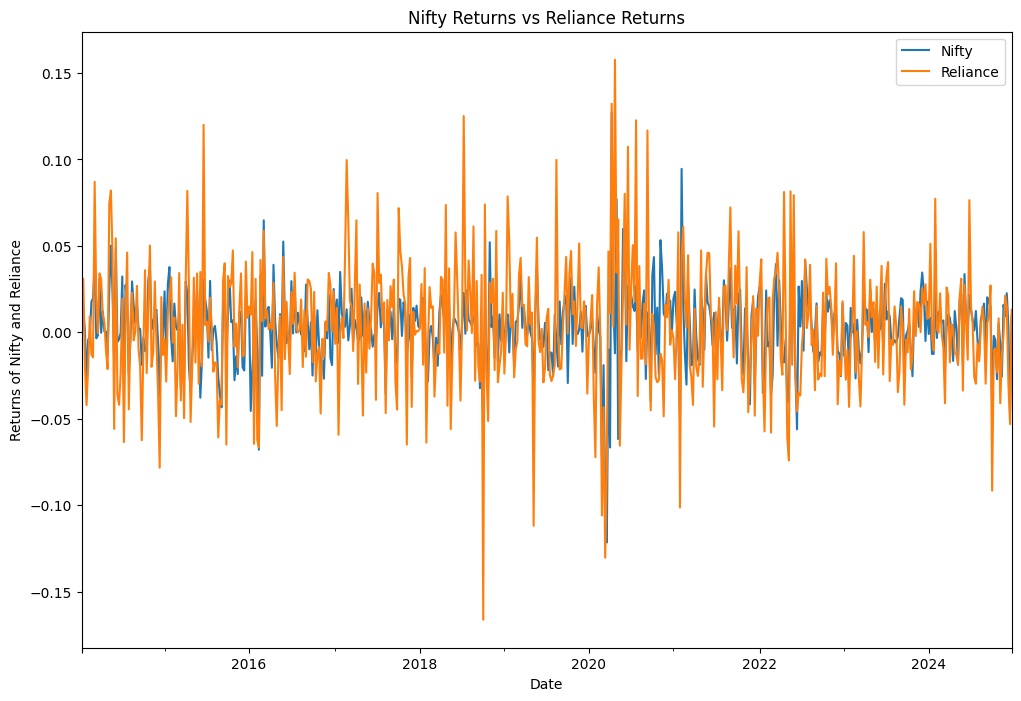

In [37]:
## Plot the returns
plt.figure(figsize=(12, 8))
nifty_df["Returns"].plot(label="Nifty")
reliance_df["Returns"].plot(label="Reliance")
plt.title("Nifty Returns vs Reliance Returns")
plt.ylabel("Returns of Nifty and Reliance")
plt.legend()
plt.show()

### STEP 3: Beta can be calculated in two possible ways

- Covariance Method
- Linear Regression

### Covariance Method: Covariance(Reliance, Nifty) / Variance(Nifty)

- As said, beta is the relationship of volatility of stock in relation to the volatility of market

In [38]:
covariance = np.cov(reliance_df["Returns"], nifty_df["Returns"])[0, 1]
variance = np.var(nifty_df["Returns"])
beta_reliance = covariance / variance
print("Beta of Reliance is:", beta_reliance)

Beta of Reliance is: 0.9996999142153937


### Linear Regression: Using y = mx + c

- The slope(m) is considered as the beta of the stock, x=dependent (stock returns), y=independent (market returns)

In [39]:
model = LinearRegression()
model.fit(nifty_df["Returns"].values.reshape(-1, 1), reliance_df["Returns"].values)
print("Beta of Reliance is:", model.coef_[0])

Beta of Reliance is: 0.9979552372272336


> NOTE: As we can see the Beta values calculated by either of the methods are equal or same i.e `0.9979`, almost equal to 1. Therefore, we can say that both the market and reliance move significantly with each other, which is true in a sense, because Reliance is the largest contributor of the Nifty index. 

<hr>

### Advantages of Beta

- Market risk: It quantifies a stock's sensitivity to market movements, helping investors understand its volatility relative to the market.
- Portfolio diversification: Helps investors create a balanced portfolio by combining high-beta (riskier, higher potential return) and low-beta (safer, stable) stocks.
- CAPM: Used to calculate the expected return of a stock, which is essential for valuing assets and estimating the cost of equity.
- Sector Analysis: Identifies which sectors tend to be more volatile, helping investors allocate resources based on their risk tolerance.
- Dynamic Nature: Beta changes over time, reflecting the evolving market and stock conditions, allowing investors to adjust strategies accordingly.

### Disadvantages of Beta

- Assumes Linear Relationship: Beta is based on the assumption of a linear relationship between a stock's returns and the market's returns, which may not always hold true.
- Historical Data Based: Beta is calculated using historical data and may not accurately predict future stock behavior, especially during market disruptions.
- Ignores Company-Specific Risks: Beta only measures systematic risk (market-related risk) and ignores unsystematic risks (company-specific risks).
- Ignores Other Risk Factors: Factors like liquidity, macroeconomic conditions, and industry trends are not captured by Beta.

<hr>

### Beta of all Nifty50 Stocks in relation with Nifty50

Let's calculate the Beta of each nifty50 stock, and analyze how is their performance, like which are high beta, low beta stocks. Date range for the analysis is: 2014-01-01 to 2024-12-27

`List of all stocks is`: ['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BEL', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBILIFE', 'SBIN', 'SHRIRAMFIN', 'SUNPHARMA', 'TATACONSUM', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'TRENT', 'ULTRACEMCO', 'WIPRO']

In [40]:
## Import Statements
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings("ignore")

## FILE AND FOLDERPATHS
NIFTY50_FILEPATH = "E:\\Market-Work\\All-Data\\Daily_Data-Stocks_Indices\\NIFTY50.csv"
STOCKS_FOLDERPATH = "E:\\Market-Work\\All-Data\\Daily_Data-Stocks_Indices"
all_stocks_list = ['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BEL', 'BHARTIARTL', 
    'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 
	'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 
    'RELIANCE', 'SBILIFE', 'SBIN', 'SHRIRAMFIN', 'SUNPHARMA', 'TATACONSUM', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'TRENT', 'ULTRACEMCO', 'WIPRO'
]
beta_dict = {"StockName": ["Nifty50"], "Beta": [1]}

## Read the Nifty file, and calculate the returns
nifty_df = pd.read_csv(NIFTY50_FILEPATH, usecols=["Date","Close"])
nifty_df["Date"] = pd.to_datetime(nifty_df["Date"], format="%Y-%m-%d")
nifty_df.set_index("Date", inplace=True)
nifty_df = nifty_df.resample("W-FRI").agg({"Close":"last"})

## Iterate through each stock, and add the answer to the dictionary
for each_stock in all_stocks_list:
	# print("==> Processing:", each_stock)
	stock_filepath = os.path.join(STOCKS_FOLDERPATH, each_stock+".csv")
	stock_df = pd.read_csv(stock_filepath, usecols=["Date","Close"])
	stock_df["Date"] = pd.to_datetime(stock_df["Date"], format="%Y-%m-%d")
	stock_df.set_index("Date", inplace=True)
	stock_df = stock_df.resample("W-FRI").agg({"Close":"last"})

	## Perform a merge with the stock df, so if there is any mismatch in dates, we can handle that
	main_df = pd.merge(left=nifty_df, right=stock_df, left_index=True, right_index=True, suffixes=["_NIFTY", f"_{each_stock}"])

	## Calculate the weekly returns, and dropna values
	main_df["Returns_NIFTY"] = main_df["Close_NIFTY"].pct_change()
	main_df[f"Returns_{each_stock}"] = main_df[f"Close_{each_stock}"].pct_change()
	main_df.dropna(inplace=True)

	## Calculate the beta of the stock
	covariance = np.cov(main_df[f"Returns_{each_stock}"], main_df["Returns_NIFTY"])[0, 1]
	variance = np.var(main_df["Returns_NIFTY"])
	beta = covariance / variance

	## Assign the value to the dict
	beta_dict["StockName"].append(each_stock)
	beta_dict["Beta"].append(beta)

## Create a dataframe of the resultant dict
beta_df = pd.DataFrame(beta_dict) 

In [41]:
## Save it in a csv
beta_df.to_csv("beta_values.csv")
beta_df

,StockName,Beta
0,Nifty50,1.000000
1,ADANIENT,1.420013
2,ADANIPORTS,1.132967
3,APOLLOHOSP,0.514287
4,ASIANPAINT,0.490872
5,AXISBANK,1.289860
6,BAJAJ-AUTO,0.862395
7,BAJAJFINSV,1.052267
8,BAJFINANCE,1.042020
9,BEL,0.814716


In [42]:
## Minimum and maximum beta stocks
min_index = beta_df["Beta"].idxmin()
max_index = beta_df["Beta"].idxmax()
print("Minimum Beta Stock is:", beta_df.loc[min_index, "StockName"], "&& its beta value is:", beta_df.loc[min_index, "Beta"])
print("Maximum Beta Stock is:", beta_df.loc[max_index, "StockName"], "&& its beta value is:", beta_df.loc[max_index, "Beta"])

Minimum Beta Stock is: BRITANNIA && its beta value is: 0.43297193087382674
Maximum Beta Stock is: TATASTEEL && its beta value is: 1.5656758225453902


As we can analyze, the beta of all the stocks are in the range of 0.432979 to 1.56567, and none of them is negative or zero. This implies that, all the stocks are correlated with the Nifty's movement. However, some have low beta and others have a high beta value.

<hr>

### Create a sample portfolio, based on just Beta-values

Creating a balanced portfolio is about finding the right mix of growth, stability, and a lot of factors. `You should never create it only based on the beta values of the stock, however it can be one metric, you should consider`. For this portfolio, the aim was to combine stocks that could perform well in rising markets with those that provide stability during market downturns.

We started by selecting high-beta stocks, which are more sensitive to market movements and can deliver higher returns in a bullish market. TATASTEEL, with a Beta of 1.57, was chosen for its strong link to economic growth. ICICIBANK and INDUSINDBK, both with Betas above 1.4, added exposure to the banking sector, which often leads market recoveries. ADANIENT, with a Beta of 1.42, was included for its high growth potential. To balance this, we added low-beta stocks, which are less volatile and provide stability when markets are uncertain. BRITANNIA (Beta 0.43) and NESTLEIND (Beta 0.47) were chosen for their reliable performance in the consumer goods sector. SUNPHARMA, with a Beta of 0.48, added diversification from the healthcare sector, which tends to be steady even during downturns.

However, you should also add some negative beta stocks to handle the downtrends of market and neutralize or lower the risk exposure to equity markets.

`IMP NOTE:` This potfolio doesn't guarantee any growth or positive expected returns as the only factor for this portfolio is the volatility of the stock. And volatility is a measure of risk, and not a measure of return. And one can never get a portfolio, based on a single factor that will outperform the markets. Moreover, this is just for educational purpose. I will post about Expected Returns and Cost of Equity in the next post.

<hr>

### Components of Nifty High Beta50

List of Stocks, that have a high Beta and are components of Nifty High Beta 50 stocks:
ACC, AARTIIND, ADANIENT, ADANIGREEN, ADANIPORTS, ADANIPOWER, ATGL, ABCAPITAL, AMBUJACEM, BANDHANBNK, BANKBARODA, BANKINDIA, BEL, BHEL, CANBK
CONCOR, DLF, GAIL, GMRAIRPORT, GODREJPROP, HFCL, HINDALCO, HINDCOPPER, HUDCO, IRB, IRFC, INDUSINDBK, JSWSTEEL, JINDALSTEL, LTF, LICHSGFIN, MANAPPURAM, NBCC, NCC, NATIONALUM, ONGC, PEL, PFC, PNB, RBLBANK, RECLTD, SJVN, SBIN, SAIL, TATAPOWER, TATASTEEL, UNIONBANK, VEDL, IDEA, ZEEL

Interested people can give a try and calculate the beta of this stocks.

<hr>

`DISCLAIMER`: This is just for the purpose of knowledge, and not any advice to create any kind of portfolio based on Beta values. Do you own analysis and invest in markets.

Thank you for reading the complete section. If you have any suggestions or doubts, comment down below or message me on linkedIn. I will write about other topics soon like CAPM model, Monte-Carlo Simulations, VaR Analysis, and some Backtested Strategies.

Currently learning about bastesting metrics, and Time-series Analysis / Forecasting

<hr>